<a href="https://colab.research.google.com/github/ScottErnst0331/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Load the data set and add column headers

import pandas as pd
import numpy as np

column_headers = ['Class_Name', 'handicapped_infants', 'water_project_cost_sharing', 'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue', 'crime', 'duty_free_exports', 'export_administration_act_south_africa']

voting_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)



In [0]:
# Examine df head to ensure load was performed properly

voting_data.head()


,Class_Name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Begin building a confidence interval of Republican votes on handicapped_infants


In [0]:
# Create new df with only votes on handicapped_infants

selected_voting_data = voting_data[['Class_Name', 'handicapped_infants']]


In [0]:
# Examine shape of new df to confirm proper creation 

selected_voting_data.shape


(435, 2)

In [0]:
# Examine head of new df to confirm proper creation

selected_voting_data.head()


,Class_Name,handicapped_infants
0,republican,n
1,republican,n
2,democrat,?
3,democrat,n
4,democrat,y


In [0]:
# Create new df with only Republican votes

selected_voting_data_reps = selected_voting_data[selected_voting_data.Class_Name != 'democrat']


In [0]:
# Examine head of new df to confirm proper creation

selected_voting_data_reps.head()


,Class_Name,handicapped_infants
0,republican,n
1,republican,n
7,republican,n
8,republican,n
10,republican,n


In [0]:
# Replace y and n values with numbers 
# Replace ? values with NaN

selected_voting_data_reps = selected_voting_data_reps.replace({'y': 1, 'n': 0, '?': np.NaN})


In [0]:
# Examine head of new df to confirm replacement of values

selected_voting_data_reps.head()


,Class_Name,handicapped_infants
0,republican,0.0
1,republican,0.0
7,republican,0.0
8,republican,0.0
10,republican,0.0


In [0]:
# Calculate mean of Republican votes on handicapped_infants

selected_voting_data_reps.mean()


handicapped_infants    0.187879
dtype: float64

In [0]:
# Check type of df

selected_voting_data_reps.dtypes


Class_Name              object
handicapped_infants    float64
dtype: object

In [0]:
# Reduce df to just the floats

votes_floats = selected_voting_data_reps['handicapped_infants']


In [0]:
# Check for null values

votes_floats.isnull().sum()


3

In [0]:
# Drop null values

clean_votes_floats = votes_floats.dropna()


In [0]:
# Recheck for NaN values

clean_votes_floats.isnull().sum()

# I now have a df with only floats and no NaN values

0

In [0]:
# Import additional library

import scipy.stats as stats


In [0]:
# Insert confidence interval function

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)


In [0]:
# Run confidence interval function on
# republican votes on handicapped_infants

confidence_interval(clean_votes_floats)


(0.12765166444807918, 0.18787878787878787, 0.24810591130949655)

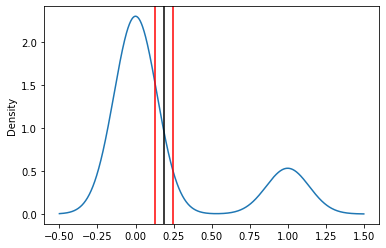

In [0]:
# Plot graph of the confidence interval

import matplotlib.pyplot as plt

lower, mean, upper = confidence_interval(clean_votes_floats)

clean_votes_floats.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()


In [0]:
# CONCLUSION

# If every Republican in history voted on the 
# handicapped_infants bill, we are 95% confident
# that the mean of that population is between
# 12.77 and 24.81.  Stated in terms of percentages,
# if every Republican in history voted on the 
# handicapped_infants bill, we are 95% confident
# that the mean of yes votes in that population 
# is between 12.77% and 24.81%.

In [0]:
# Chi^2 Test By Hand Using NumPy

# Load adults data set

adults = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")


In [122]:
# Describe categorical values in df

adults.describe(exclude='number')


,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [123]:
# Describe numerical values in df

adults.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [136]:
# Create crosstab of observed values for 
# race and marital status
# without row and column totals (a.k.a. without margins)

observed_values_without_margins = pd.crosstab(adults['race'], adults['marital-status'])

observed_values_without_margins


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
race,,,,,,,
Amer-Indian-Eskimo,60,0,116,9,103,11,12
Asian-Pac-Islander,75,0,508,41,372,19,24
Black,485,1,837,62,1346,265,128
Other,26,0,105,15,105,13,7
White,3797,22,13410,291,8757,717,822


In [124]:
# Create crosstab of observed values for 
# race and marital status
# with row and column totals (a.k.a. with margins)

observed_values_with_margins = pd.crosstab(adults['race'], adults['marital-status'], margins=True)

observed_values_with_margins


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
race,,,,,,,,
Amer-Indian-Eskimo,60,0,116,9,103,11,12,311
Asian-Pac-Islander,75,0,508,41,372,19,24,1039
Black,485,1,837,62,1346,265,128,3124
Other,26,0,105,15,105,13,7,271
White,3797,22,13410,291,8757,717,822,27816
All,4443,23,14976,418,10683,1025,993,32561


In [125]:
observed_values_with_margins.shape


(6, 8)

In [139]:
# Ceate array of row totals 
# There are 6 rows, including the total row, so the total row is in index position 5
# There are 8 columns, including the total column, so the total column is in index position 7

# The second line of code transposes the shape
# of the resulting array into a horizontal array

row_totals = observed_values_with_margins.iloc[0:5, 7:].values
row_totals = row_totals.T[0]
row_totals

array([  311,  1039,  3124,   271, 27816])

In [128]:
# Ceate array of column totals 
# There are 6 rows, including the total row, so the total row is in index position 5
# There are 8 columns, including the total column, so the total column is in index position 7

column_totals = observed_values_with_margins.iloc[5, 0:7].values
column_totals

array([ 4443,    23, 14976,   418, 10683,  1025,   993])

In [132]:
# Get the grand total of the observations

grand_total = adults.shape[0]
grand_total

32561

In [140]:
# Run Chi^2 test by hand using NumPy

expected = []
for i in range(len(row_totals)):
  expected_row = []
  for column in column_totals:
    expected_val = column*row_totals[i]/grand_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)


(5, 7)
[[4.24364424e+01 2.19679985e-01 1.43040324e+02 3.99244495e+00
  1.02036578e+02 9.79008630e+00 9.48444458e+00]
 [1.41773195e+02 7.33914806e-01 4.77874267e+02 1.33381039e+01
  3.40887473e+02 3.27070729e+01 3.16859740e+01]
 [4.26274746e+02 2.20668898e+00 1.43684236e+03 4.01041737e+01
  1.02495906e+03 9.83415743e+01 9.52713983e+01]
 [3.69783790e+01 1.91425325e-01 1.24642855e+02 3.47894721e+00
  8.89129019e+01 8.53091121e+00 8.26458033e+00]
 [3.79553724e+03 1.96482909e+01 1.27936002e+04 3.57086330e+02
  9.12620399e+03 8.75630355e+02 8.48293603e+02]]


In [141]:
# Calculate Chi^2

chi2 = ((observed_values_without_margins - expected)**2 / expected).sum().sum()

chi2

923.8086971524608

In [143]:
# Calculate Chi^2 with SciPy

# pass in our observed value table (contingency table)
chi2, p_value, dof, expected = stats.chi2_contingency(observed_values_without_margins)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)


 chi2 statistic 923.8086971524608

 p-value 1.3087338193819433e-179

 degrees of freedom 24

 expected frequencies table: 
 [[4.24364424e+01 2.19679985e-01 1.43040324e+02 3.99244495e+00
  1.02036578e+02 9.79008630e+00 9.48444458e+00]
 [1.41773195e+02 7.33914806e-01 4.77874267e+02 1.33381039e+01
  3.40887473e+02 3.27070729e+01 3.16859740e+01]
 [4.26274746e+02 2.20668898e+00 1.43684236e+03 4.01041737e+01
  1.02495906e+03 9.83415743e+01 9.52713983e+01]
 [3.69783790e+01 1.91425325e-01 1.24642855e+02 3.47894721e+00
  8.89129019e+01 8.53091121e+00 8.26458033e+00]
 [3.79553724e+03 1.96482909e+01 1.27936002e+04 3.57086330e+02
  9.12620399e+03 8.75630355e+02 8.48293603e+02]]


In [0]:
# CONCLUSION

# Based on a Chi^2 of 923.81 and a p-value of near zero,
# we reject the null hypotheis that race and marital status
# are independent.  Furthermore, we suggest the alternative 
# hypotheis that race and marital status are strongly associated.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)